In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import pandas as pd

def make_pivot_table_hypergate(df_hypergate,dataset = 'large PBMC', cell_type_key = 'cluster cell_type_lvl_1'):
    df_hypergate = df_hypergate.rename(columns={'cell_type': 'celltype'})
    df_hypergate['dataset'] = dataset
    df_hypergate['model'] = 'Hypergate'
    df_hypergate = df_hypergate.pivot_table(
    index=['sample', 'celltype', 'set_size', 'ratio', 'train_ratio', 'time', 'model','dataset'],
    columns='score',
    values='value'
        ).reset_index()
    df_hypergate = df_hypergate.drop(columns=['train_ratio'])
    df_hypergate.columns.name = None
    df_hypergate['cell_type_key'] = cell_type_key
    df_hypergate = df_hypergate.rename(columns={'set_size': 'set'})
    return df_hypergate

In [2]:
base_path = os.getcwd()
pre = 'rev09_NatComm'
base_save_path_rev09 = 'C:\\Users\\vfriedrich\\projects\\gating\\revision\\NatComm\\rev09_NatComm'

### ratio 1:1

In [3]:
base_path_1to1 = 'C:\\Users\\vfriedrich\\projects\\gating\\revision\\NatComm\\rev09_NatComm\\input\\ratio_1to1'

In [4]:
#large PBMC lvl1
df_Hypergate_largePBMC_lvl1 = pd.read_csv(os.path.join(base_path_1to1,'HIV_data_annotated_final_cluster cell_type_lvl_1_hypergate.csv'))
df_Hypergate_largePBMC_lvl1 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_largePBMC_lvl1,
                                                         dataset = 'large PBMC',
                                                        cell_type_key = 'cluster cell_type_lvl_1')

#large PBMC lvl1
df_Hypergate_largePBMC_lvl2 = pd.read_csv(os.path.join(base_path_1to1,'HIV_data_annotated_final_cluster cell_type_lvl_2_hypergate.csv'))
df_Hypergate_largePBMC_lvl2 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_largePBMC_lvl2,
                                                         dataset = 'large PBMC',
                                                        cell_type_key = 'cluster cell_type_lvl_2')

df_Hypergate_Oetjen_lvl2 = pd.read_csv(os.path.join(base_path_1to1,'cytof_data_tmp_cell_type_lvl2_hypergate(1).csv'))
df_Hypergate_Oetjen_lvl2 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_Oetjen_lvl2,
                                                         dataset = 'Oetjen',
                                                        cell_type_key = 'cell_type_lvl2')

df_Hypergate_Oetjen_lvl3 = pd.read_csv(os.path.join(base_path_1to1,'cytof_data_tmp_cell_type_lvl3_hypergate(1).csv'))
df_Hypergate_Oetjen_lvl3 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_Oetjen_lvl3,
                                                         dataset = 'Oetjen',
                                                        cell_type_key = 'cell_type_lvl3')

df_Hypergate_Oetjen_lvl4 = pd.read_csv(os.path.join(base_path_1to1,'cytof_data_tmp_cell_type_lvl4_hypergate(1).csv'))
df_Hypergate_Oetjen_lvl4 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_Oetjen_lvl4,
                                                         dataset = 'Oetjen',
                                                        cell_type_key = 'cell_type_lvl4')

df_Hypergate_Oetjen_lvl5 = pd.read_csv(os.path.join(base_path_1to1,'cytof_data_tmp_cell_type_lvl5_hypergate(1).csv'))
df_Hypergate_Oetjen_lvl5 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_Oetjen_lvl5,
                                                         dataset = 'Oetjen',
                                                        cell_type_key = 'cell_type_lvl5')

df_Hypergate_smallDC_lvl1 = pd.read_csv(os.path.join(base_path_1to1,'mono_merge_annotated_cell_types_hypergate(2).csv'))
df_Hypergate_smallDC_lvl1 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_smallDC_lvl1,
                                                         dataset = 'small DC',
                                                        cell_type_key = 'cell_types')

df_Hypergate_smallDC_lvl2 = pd.read_csv(os.path.join(base_path_1to1,'mono_merge_annotated_cell_types_lvl2_hypergate(2).csv'))
df_Hypergate_smallDC_lvl2 = make_pivot_table_hypergate(df_hypergate = df_Hypergate_smallDC_lvl2,
                                                         dataset = 'small DC',
                                                        cell_type_key = 'cell_types_lvl2')

In [5]:
# 4 methods to compare
df_Hypergate_1to1 = pd.concat([
    df_Hypergate_largePBMC_lvl1,
    df_Hypergate_largePBMC_lvl2,
    df_Hypergate_Oetjen_lvl2,
    df_Hypergate_Oetjen_lvl3,
    df_Hypergate_Oetjen_lvl4,
    df_Hypergate_Oetjen_lvl5,
    df_Hypergate_smallDC_lvl1,
    df_Hypergate_smallDC_lvl2
], ignore_index=True)
df_linSVM_1to1 = pd.read_csv(os.path.join(base_path_1to1,'performance_linearSVM_ratio_1_to_1.csv'),index_col=0)
df_linSVM_1to1['dataset'] = df_linSVM_1to1['dataset'].replace('cytof_data_tmp', 'Oetjen')

df_CG_1to1 = pd.read_csv(os.path.join(base_path_1to1,'performance_cg_ratio_1_to_1.csv'),index_col=0) 
df_CG_1to1 = df_CG_1to1.rename(columns={'cluster': 'celltype'})
df_CG_1to1 = df_CG_1to1.drop(columns=['hierarchy'])

df_rbfSVM_1to1 = pd.read_csv(os.path.join(base_path_1to1,'performance_RBFSVM_ratio_1_to_1.csv'),index_col=0) 
df_rbfSVM_1to1['dataset'] = df_rbfSVM_1to1['dataset'].replace('cytof_data_tmp', 'Oetjen')

df_all_1to1 = pd.concat([df_Hypergate_1to1,df_linSVM_1to1,df_CG_1to1,df_rbfSVM_1to1])

In [6]:
df_all_1to1['dataset_celltypekey'] = df_all_1to1['dataset'] + '_' + df_all_1to1['cell_type_key']

# Melt the DataFrame using the new column
df_melted_1to1 = pd.melt(
    df_all_1to1,
    id_vars=['dataset_celltypekey', 'celltype', 'model', 'set'],
    value_vars=['precision', 'recall', 'f1'],
    var_name='score_type',
    value_name='score_value'
)

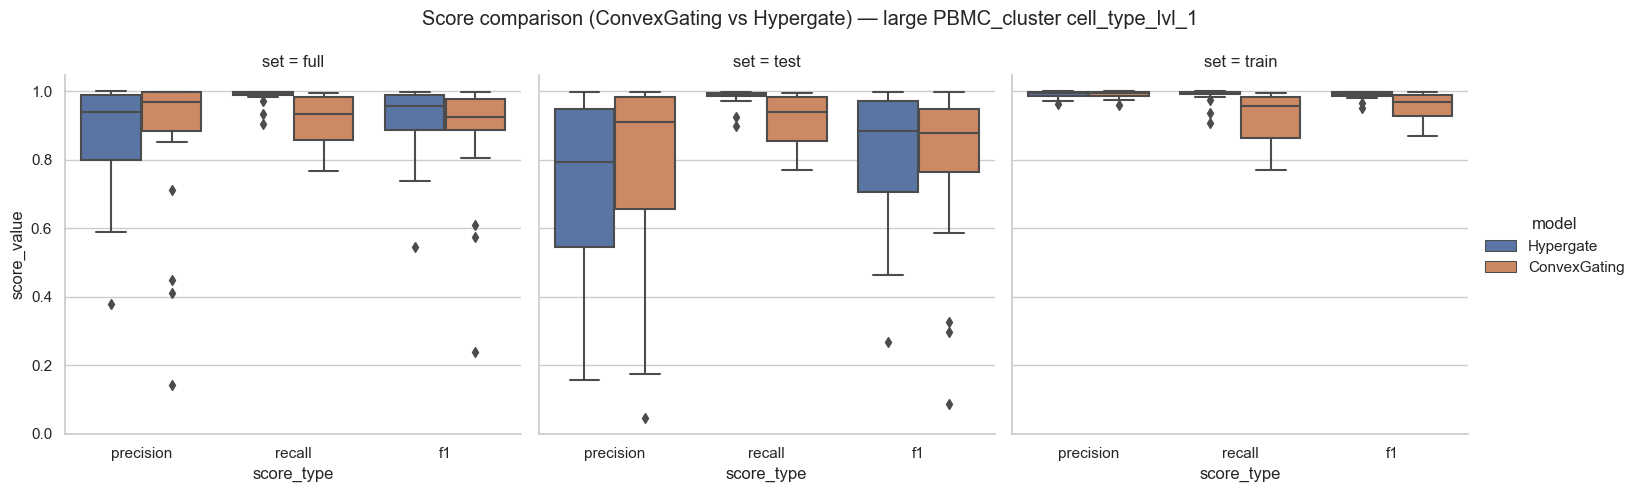

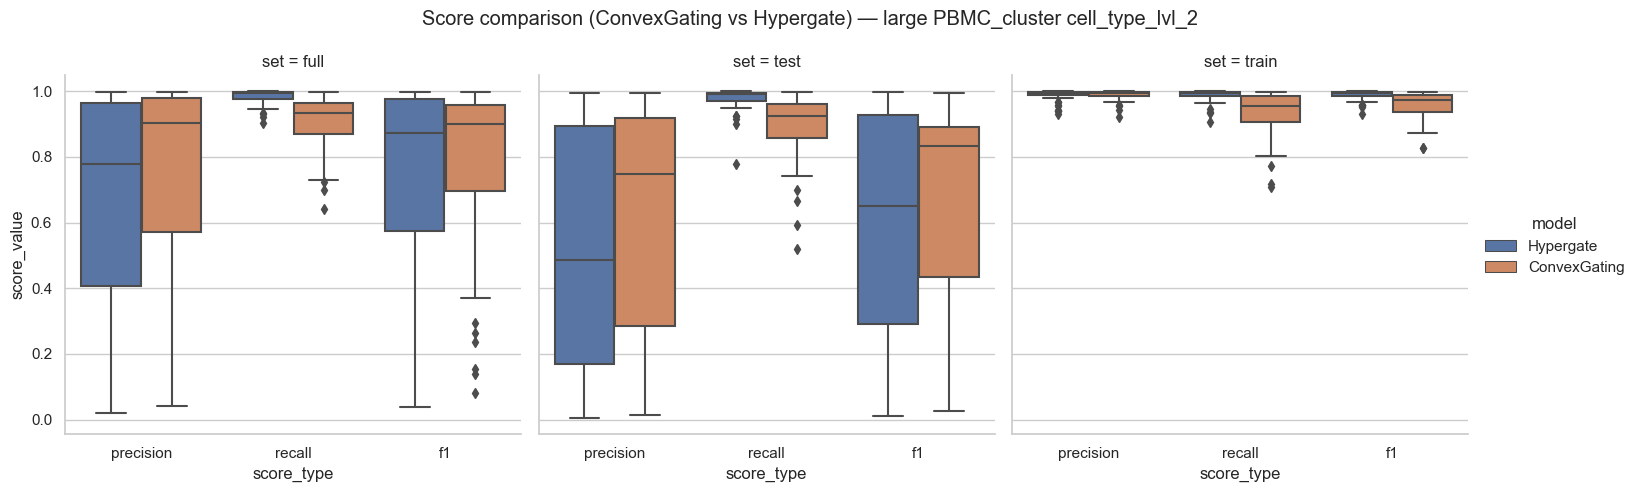

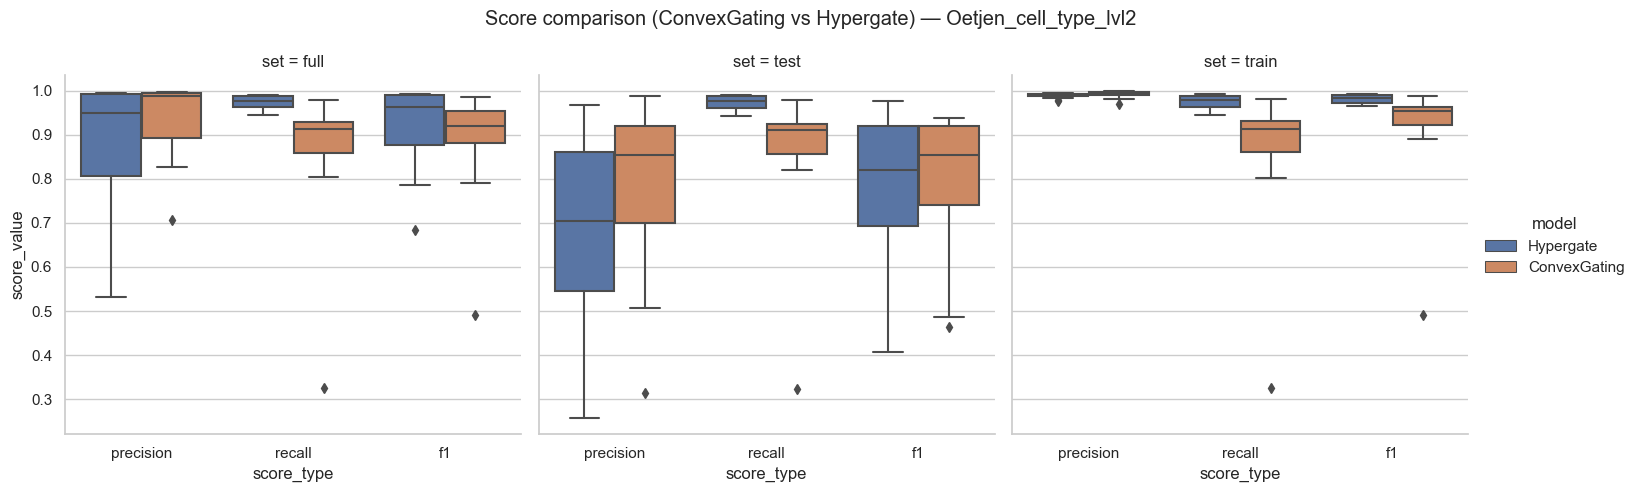

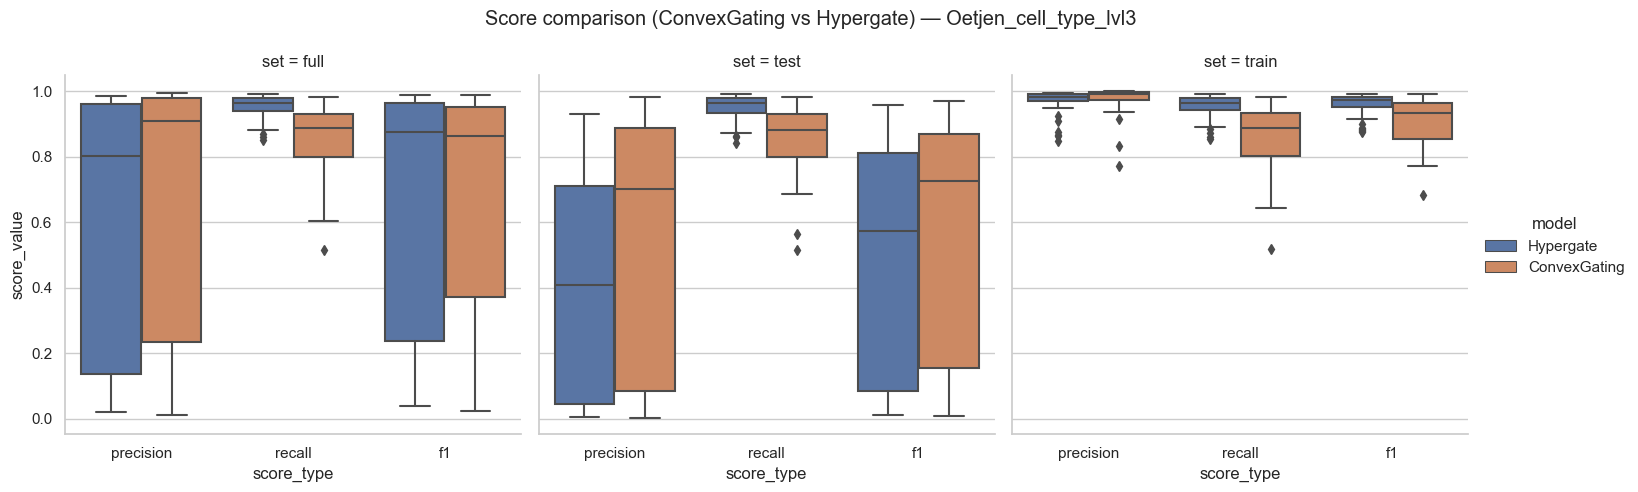

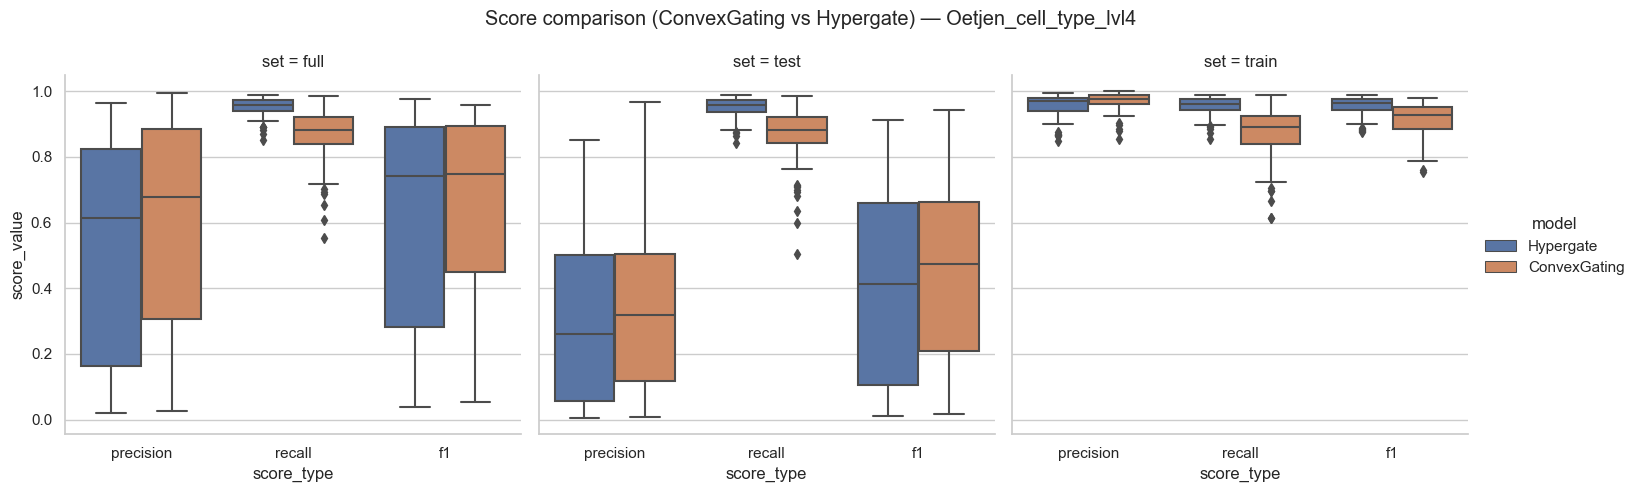

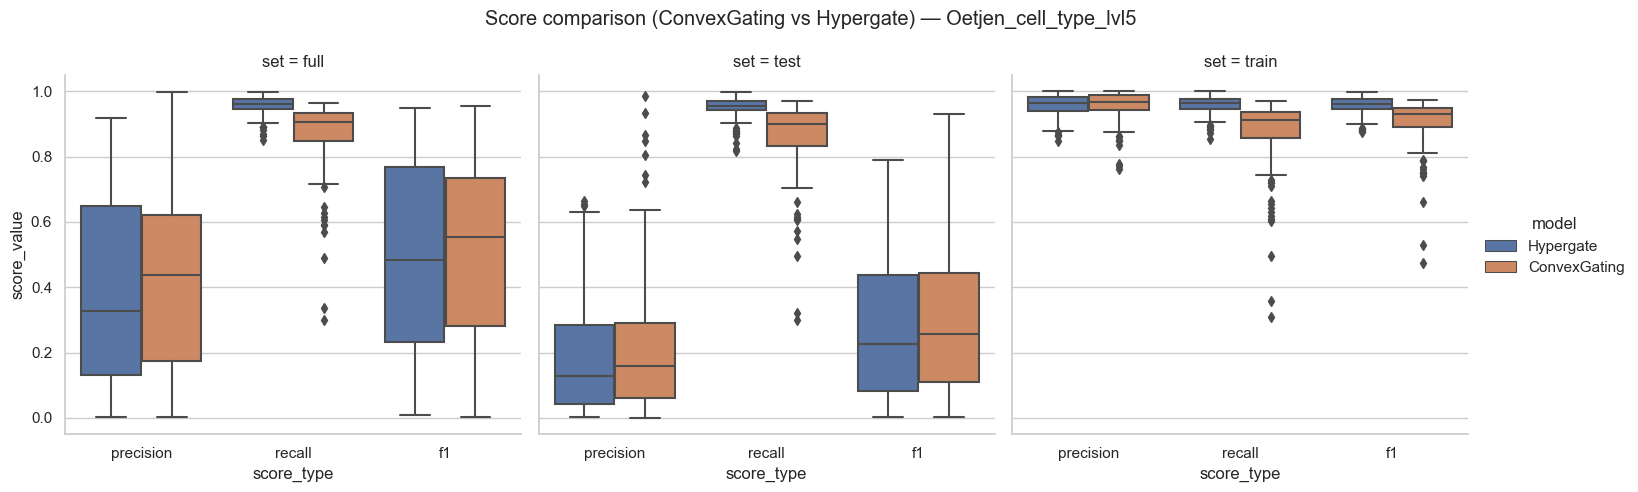

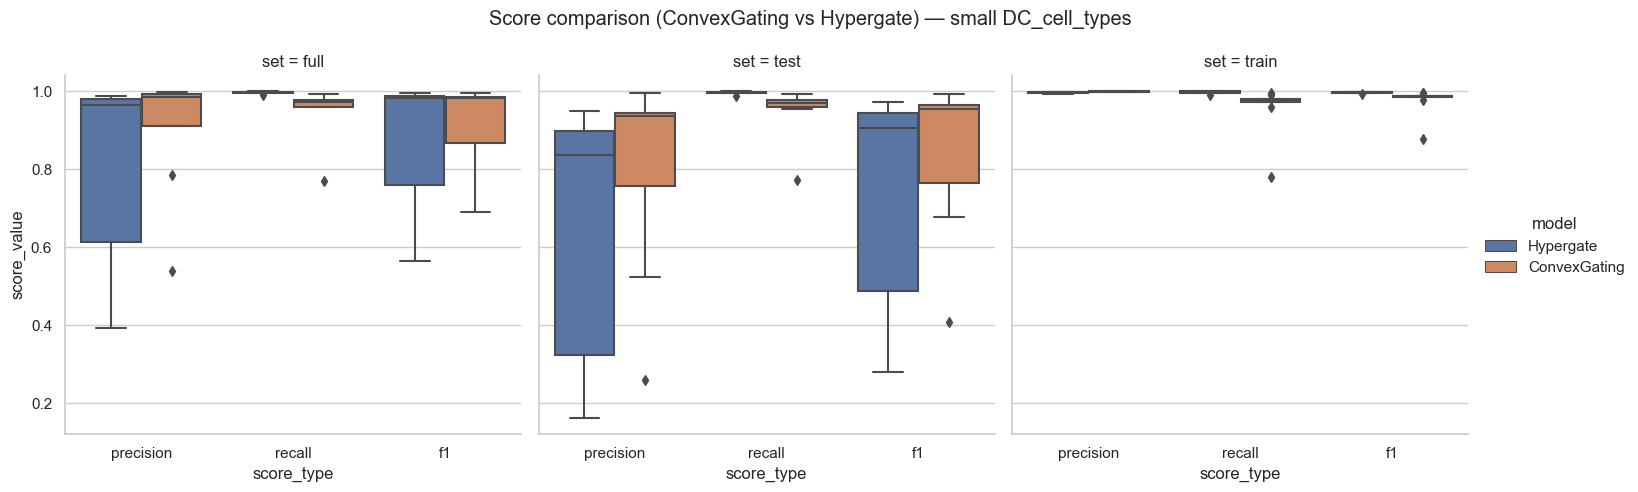

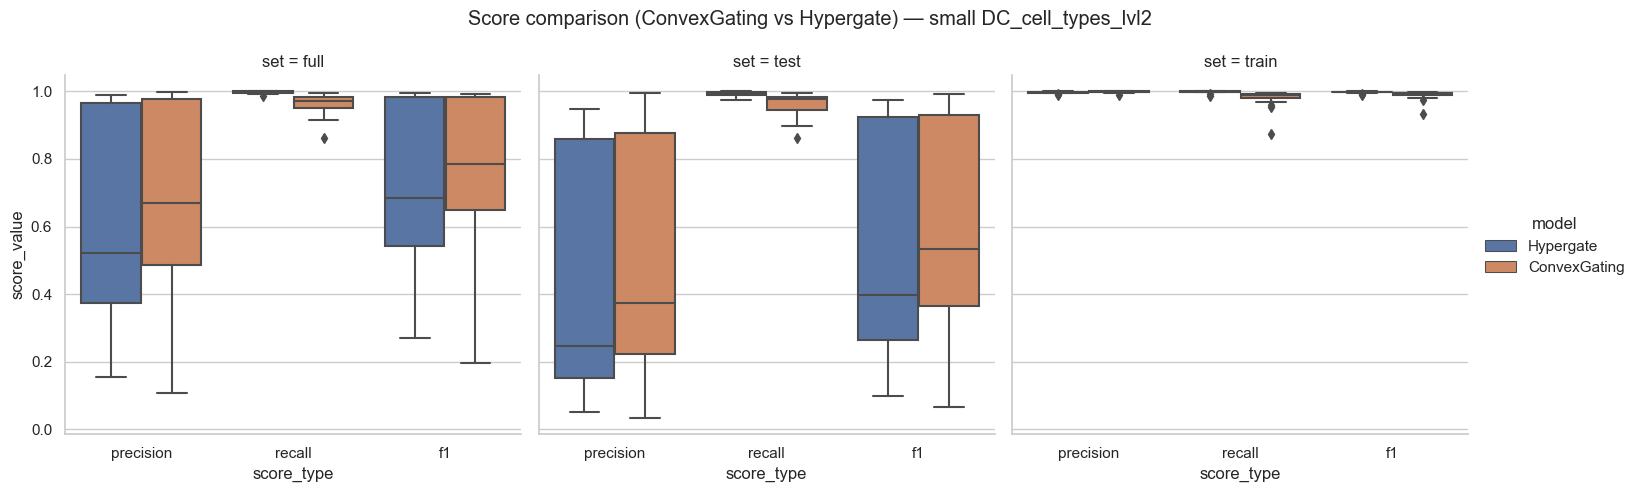

In [7]:
df_filtered = df_melted_1to1[df_melted_1to1['model'].isin(['ConvexGating', 'Hypergate'])]

sns.set(style="whitegrid")
for key in df_filtered['dataset_celltypekey'].unique():
    subset = df_filtered[df_filtered['dataset_celltypekey'] == key]

    g = sns.catplot(
        data=subset,
        x='score_type', y='score_value', hue='model',
        col='set', kind='box',
        height=5, aspect=1
    )
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle(f'Score comparison (ConvexGating vs Hypergate) — {key}')
    plt.show()

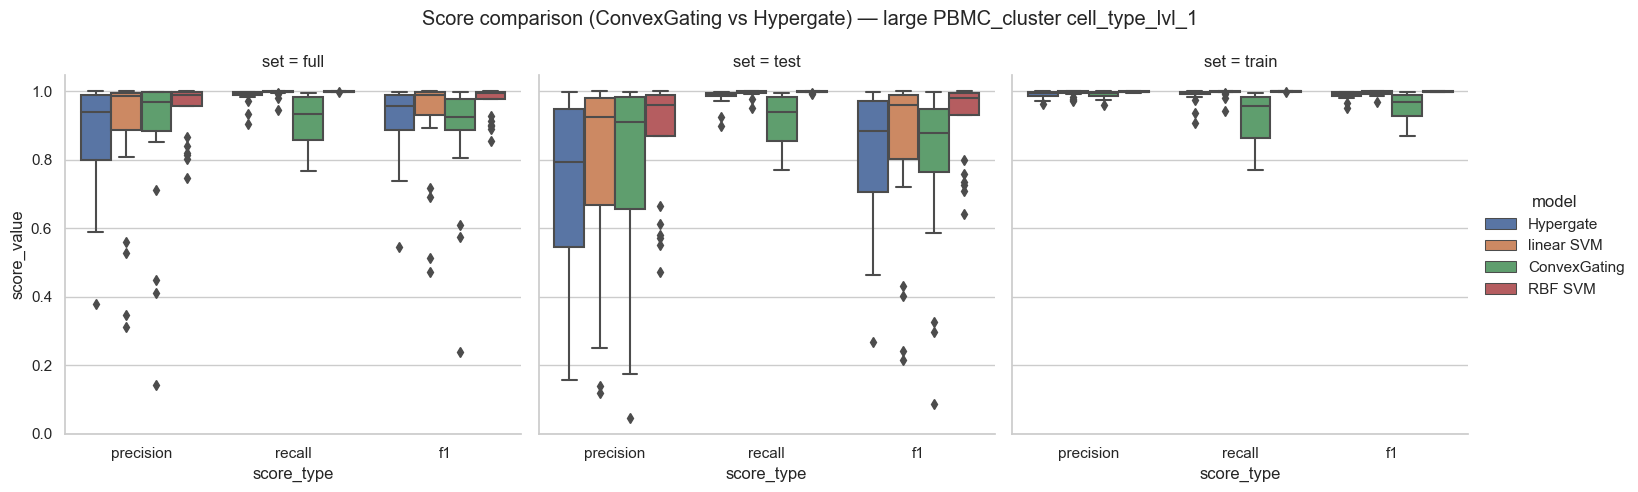

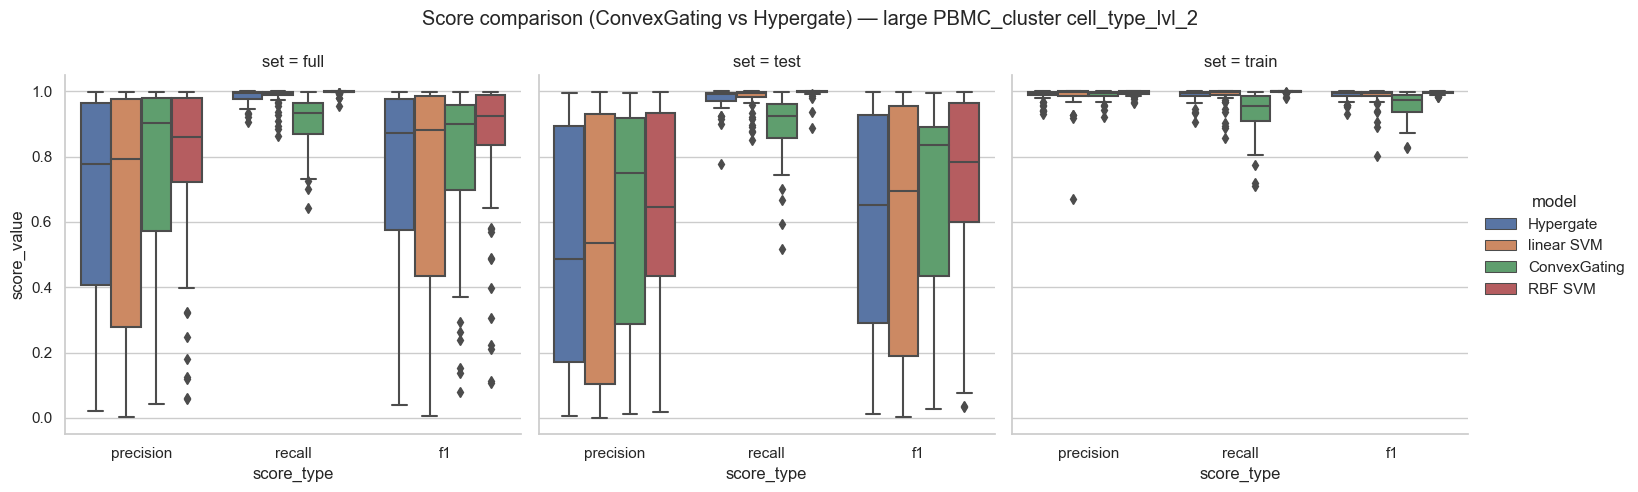

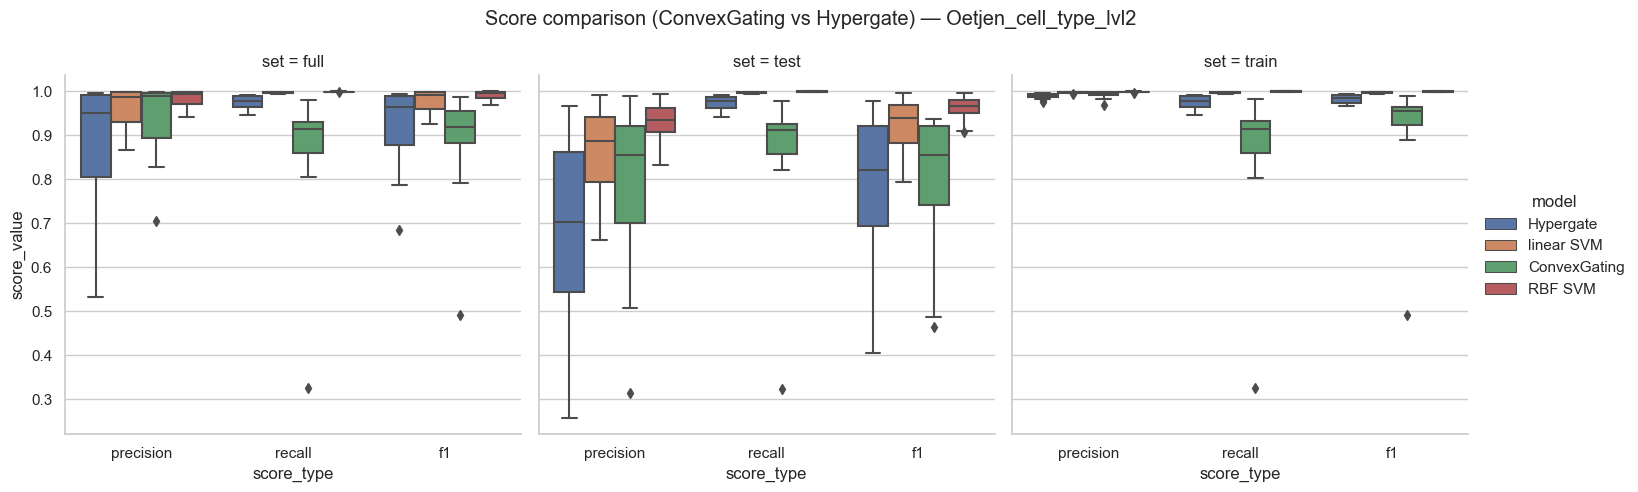

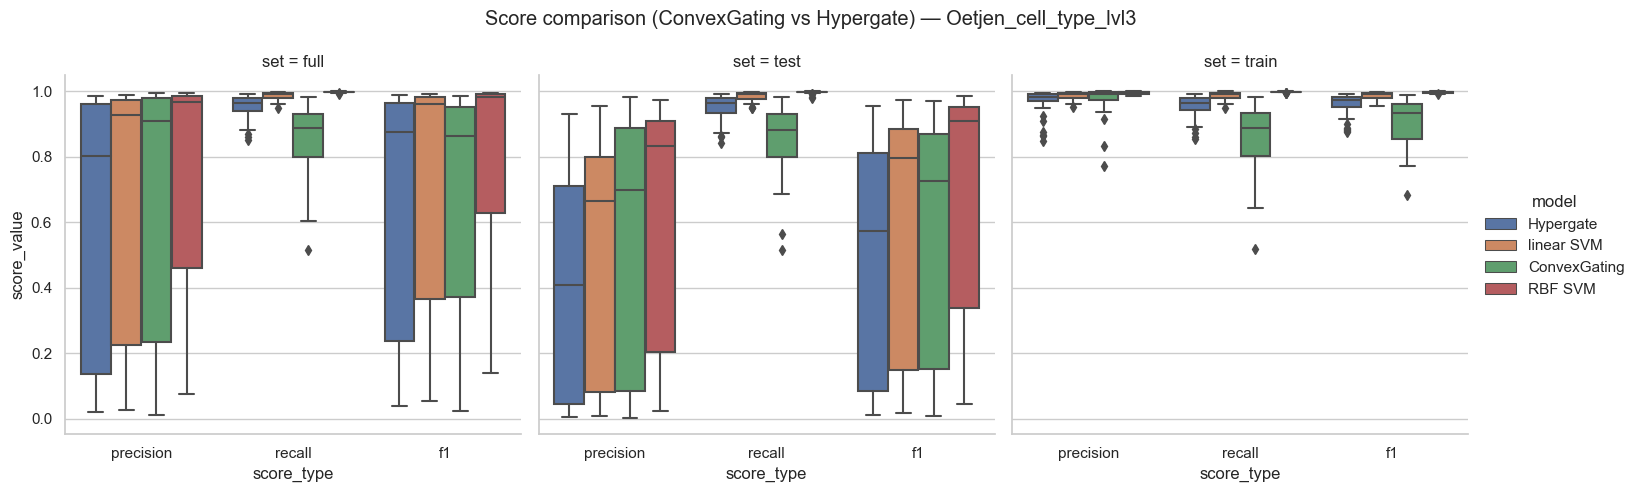

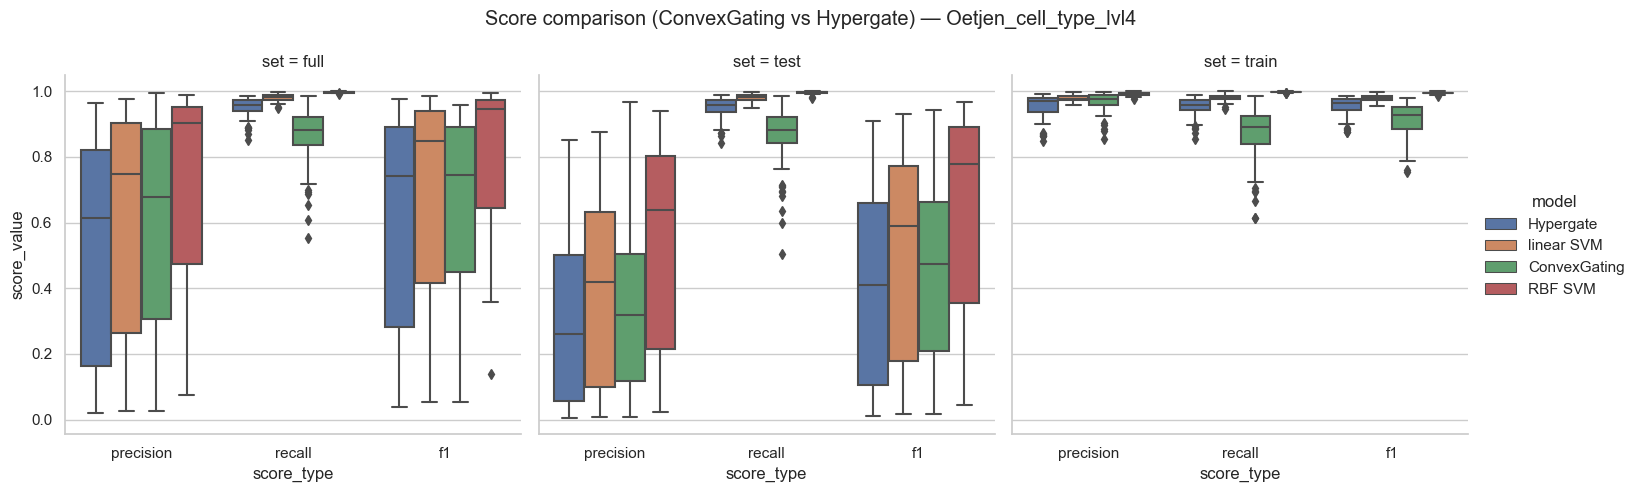

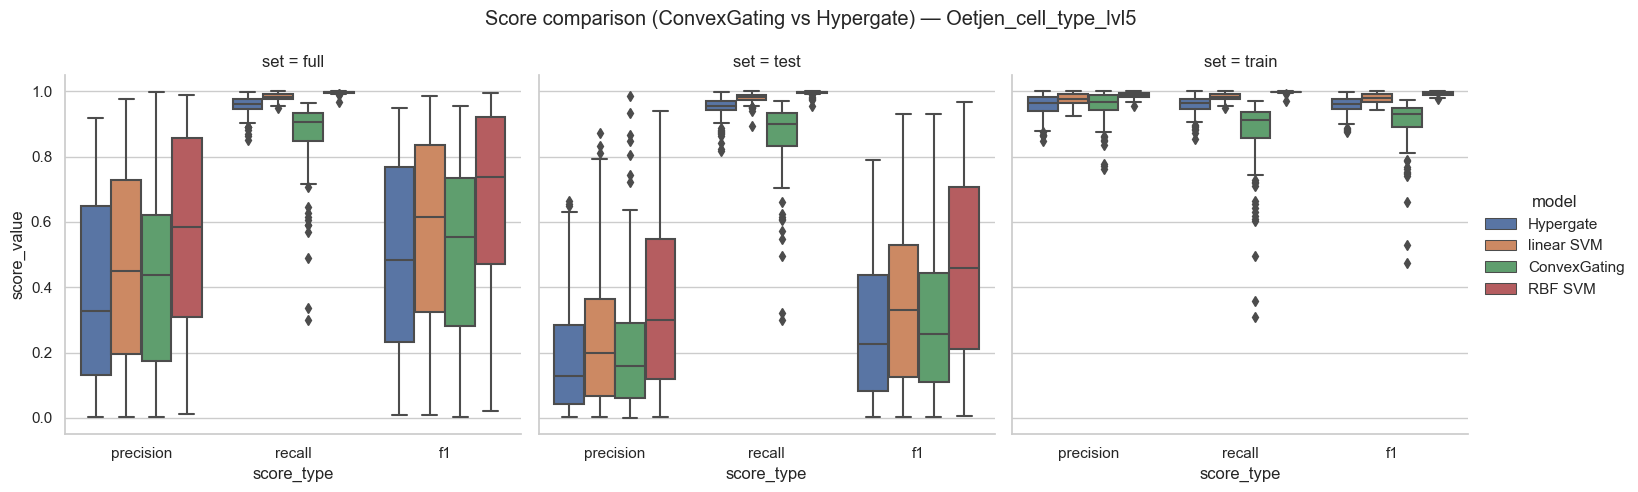

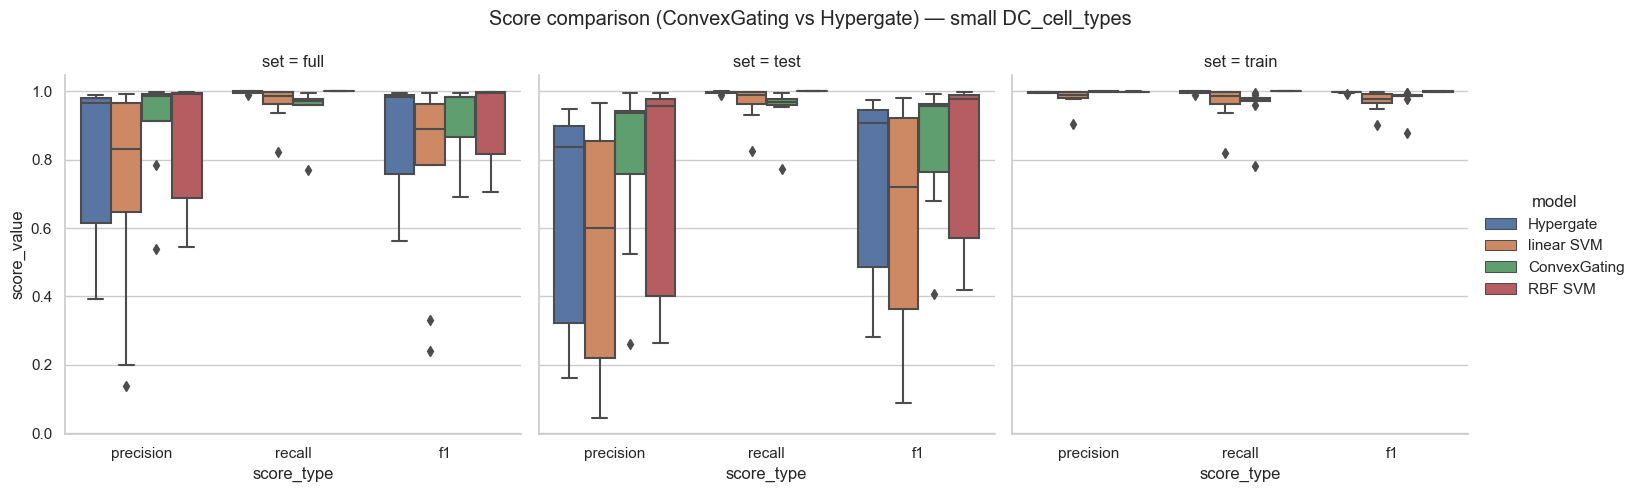

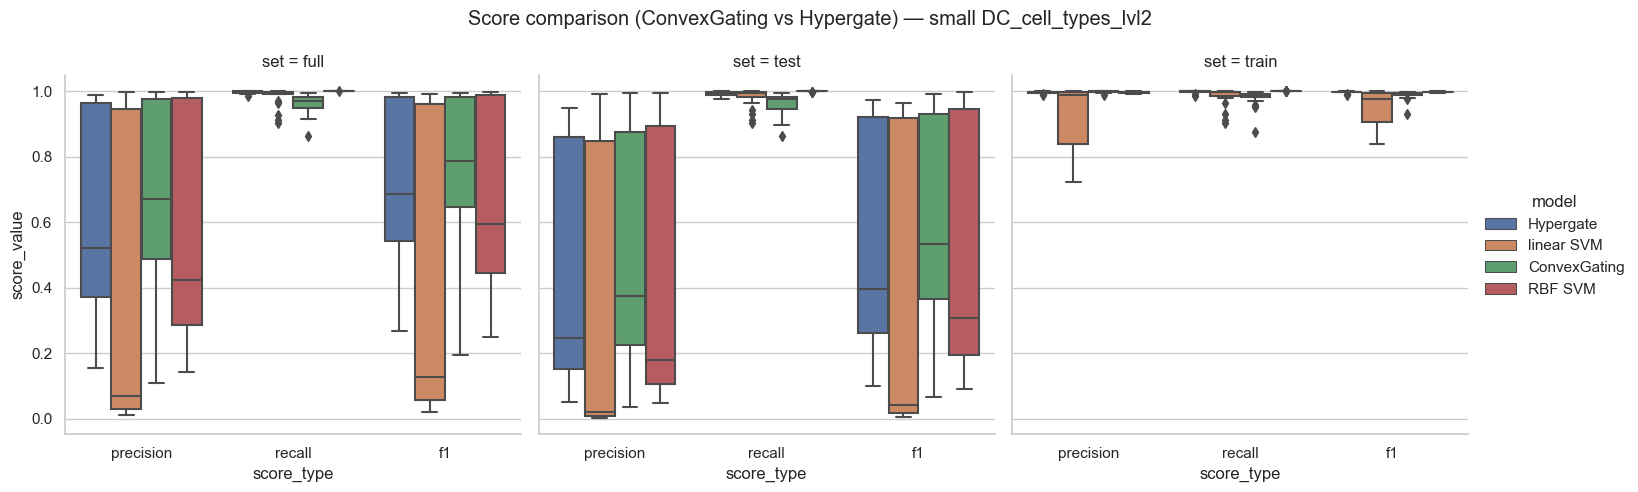

In [8]:
sns.set(style="whitegrid")
for key in df_melted_1to1['dataset_celltypekey'].unique():
    subset = df_melted_1to1[df_melted_1to1['dataset_celltypekey'] == key]

    g = sns.catplot(
        data=subset,
        x='score_type', y='score_value', hue='model',
        col='set', kind='box',
        height=5, aspect=1
    )
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle(f'Score comparison (ConvexGating vs Hypergate) — {key}')
    plt.show()

In [15]:
df_all_1to1

,sample,celltype,set,ratio,time,model,dataset,f1,precision,recall,cell_type_key,dataset_celltypekey
0,0,B cell,full,1,6.204816,Hypergate,large PBMC,0.918143,0.904283,0.932435,cluster cell_type_lvl_1,large PBMC_cluster cell_type_lvl_1
1,0,B cell,test,1,0.727591,Hypergate,large PBMC,0.820764,0.737676,0.924945,cluster cell_type_lvl_1,large PBMC_cluster cell_type_lvl_1
2,0,B cell,train,1,5.477225,Hypergate,large PBMC,0.966754,1.000000,0.935647,cluster cell_type_lvl_1,large PBMC_cluster cell_type_lvl_1
3,0,Dendritic cell,full,1,12.777905,Hypergate,large PBMC,0.800955,0.671654,0.991908,cluster cell_type_lvl_1,large PBMC_cluster cell_type_lvl_1
4,0,Dendritic cell,test,1,0.691029,Hypergate,large PBMC,0.549928,0.381373,0.985477,cluster cell_type_lvl_1,large PBMC_cluster cell_type_lvl_1
...,...,...,...,...,...,...,...,...,...,...,...,...
973,4,Intermediate monocyte,test,1:1,3.214172,RBF SVM,large PBMC,0.225508,0.127216,0.991870,cluster cell_type_lvl_2,large PBMC_cluster cell_type_lvl_2
974,4,Intermediate monocyte,full,1:1,3.244048,RBF SVM,large PBMC,0.490907,0.325767,0.995603,cluster cell_type_lvl_2,large PBMC_cluster cell_type_lvl_2
975,4,Non-classical monocyte,train,1:1,0.333767,RBF SVM,large PBMC,0.998079,0.996803,0.999359,cluster cell_type_lvl_2,large PBMC_cluster cell_type_lvl_2
976,4,Non-classical monocyte,test,1:1,1.969442,RBF SVM,large PBMC,0.888225,0.798924,1.000000,cluster cell_type_lvl_2,large PBMC_cluster cell_type_lvl_2


In [30]:
np.median(df_all_1to1[df_all_1to1['model'] == 'Hypergate']['time'])

3.6292048692703247

In [40]:
np.max(df_all_1to1[df_all_1to1['model'] == 'ConvexGating']['time'])

6825.016257762909

In [34]:
np.median(df_all_1to1[df_all_1to1['model'] == 'RBF SVM']['time'])

5.351453900337219

In [36]:
np.median(df_all_1to1[df_all_1to1['model'] == 'linear SVM']['time'])

0.0533194541931152

In [38]:
np.mean(df_all_1to15[df_all_1to15['model'] == 'ConvexGating']['time'])

52.892020084862814